In [1]:
import gdown
import zipfile


In [2]:
!gdown 1fKUl6TWVrw2NFCaRZFC3g7qdY2g8YyVb

Downloading...
From (original): https://drive.google.com/uc?id=1fKUl6TWVrw2NFCaRZFC3g7qdY2g8YyVb
From (redirected): https://drive.google.com/uc?id=1fKUl6TWVrw2NFCaRZFC3g7qdY2g8YyVb&confirm=t&uuid=47fc7fd1-0b3b-4d0c-9f4a-48cf31fe4eb6
To: /content/IMDB Dataset.csv.zip
100% 27.0M/27.0M [00:00<00:00, 31.1MB/s]


In [3]:
zip = zipfile.ZipFile("IMDB Dataset.csv.zip")
zip.extractall()
zip.close()

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
import re,string,unicodedata

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers,optimizers


In [5]:
data=pd.read_csv('./IMDB Dataset.csv')
print(data.shape)
data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [6]:
data.iloc[0,0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [7]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## Pulizia Testo

In [8]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\d+', '', text)
    # Lowercase
    text = text.lower()
    return text

In [69]:
data_copy = pd.read_csv('./IMDB Dataset.csv')
data["review"] = data["review"].apply(lambda x: clean_text(x))

In [10]:
data["review"]

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [11]:
data.iloc[0,0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty picture

In [12]:
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
stop_words


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
def lemmatizer(text):
  wl  = WordNetLemmatizer()
  text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop_words and word.isalpha()])

  return text

In [16]:
data['review']=data['review'].apply(lemmatizer)

In [17]:
data.iloc[0,0]

'one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bit

In [18]:
data_copy.iloc[0,0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty picture

In [19]:
categorical = {'positive': True, 'negative': False}
targets = data['sentiment'].map(categorical).astype(int)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data["review"], targets, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [21]:
x_train.shape, x_val.shape, x_test.shape

((30000,), (10000,), (10000,))

In [22]:
MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
V = len(word_index)
print("Vocabulary of the dataset is : ",V)

Vocabulary of the dataset is :  145779


In [23]:
word_index

{'<oov>': 1,
 'movie': 2,
 'film': 3,
 'one': 4,
 'like': 5,
 'time': 6,
 'good': 7,
 'character': 8,
 'get': 9,
 'story': 10,
 'even': 11,
 'would': 12,
 'make': 13,
 'see': 14,
 'really': 15,
 'scene': 16,
 'much': 17,
 'well': 18,
 'people': 19,
 'great': 20,
 'bad': 21,
 'also': 22,
 'first': 23,
 'show': 24,
 'way': 25,
 'dont': 26,
 'thing': 27,
 'made': 28,
 'could': 29,
 'think': 30,
 'life': 31,
 'go': 32,
 'know': 33,
 'watch': 34,
 'love': 35,
 'many': 36,
 'seen': 37,
 'actor': 38,
 'plot': 39,
 'two': 40,
 'never': 41,
 'say': 42,
 'look': 43,
 'end': 44,
 'acting': 45,
 'best': 46,
 'year': 47,
 'little': 48,
 'ever': 49,
 'take': 50,
 'better': 51,
 'man': 52,
 'come': 53,
 'still': 54,
 'work': 55,
 'find': 56,
 'part': 57,
 'something': 58,
 'want': 59,
 'give': 60,
 'lot': 61,
 'back': 62,
 'im': 63,
 'real': 64,
 'guy': 65,
 'director': 66,
 'performance': 67,
 'didnt': 68,
 'watching': 69,
 'doesnt': 70,
 'woman': 71,
 'play': 72,
 'though': 73,
 'actually': 74,
 'f

In [24]:
tokenizer_all_data = Tokenizer(num_words = MAX_VOCAB_SIZE,oov_token="<oov>")
tokenizer_all_data.fit_on_texts(data_copy["review"])
word_index_all_data = tokenizer_all_data.word_index
V_all_data = len(word_index_all_data)
print("Vocabulary of the dataset is : ",V_all_data)

Vocabulary of the dataset is :  216761


In [25]:
word_index_all_data

{'<oov>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'with': 15,
 'for': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'he': 27,
 'one': 28,
 'its': 29,
 'at': 30,
 'all': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'who': 35,
 'from': 36,
 'like': 37,
 'so': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'about': 42,
 'has': 43,
 'out': 44,
 'if': 45,
 'some': 46,
 'what': 47,
 'there': 48,
 'good': 49,
 'more': 50,
 'very': 51,
 'when': 52,
 'even': 53,
 'up': 54,
 'no': 55,
 'my': 56,
 'would': 57,
 'she': 58,
 'time': 59,
 'only': 60,
 'which': 61,
 'really': 62,
 'their': 63,
 'see': 64,
 'were': 65,
 'story': 66,
 'had': 67,
 'can': 68,
 'me': 69,
 'than': 70,
 'much': 71,
 'we': 72,
 'well': 73,
 'been': 74,
 'get': 75,
 'will': 76,
 'into': 77,
 'other': 78,
 'great': 79,
 'do': 80,
 'bad': 81,
 'because': 82

In [26]:
seq_train = tokenizer.texts_to_sequences(x_train)
seq_val = tokenizer.texts_to_sequences(x_val)
seq_test =  tokenizer.texts_to_sequences(x_test)

In [27]:
seq_train[0]

[4,
 263,
 35,
 119,
 569,
 1,
 2980,
 3002,
 111,
 13,
 2583,
 1,
 569,
 217,
 530,
 257,
 1,
 35,
 3539,
 389,
 1,
 7745,
 111,
 502,
 2102,
 125,
 263,
 1,
 33,
 61,
 19,
 42,
 1,
 292,
 30,
 151,
 3002,
 1,
 15,
 5335,
 386,
 7745,
 111,
 1,
 1158,
 35,
 263,
 30,
 46,
 1,
 1,
 6797,
 1,
 30,
 317,
 9,
 110,
 7745,
 1,
 35,
 227,
 1,
 112,
 5,
 1,
 126]

In [28]:
seq_len_list = [len(i) for i in seq_train]

max_len=max(seq_len_list)
print('Maximum length of sequence in the list: {}'.format(max_len))


Maximum length of sequence in the list: 1420


In [29]:
max_seq_len = np.mean(seq_len_list) + 2 * np.std(seq_len_list)
max_seq_len = int(max_seq_len)
print('Maximum length of the sequence when considering data only two standard deviations from average: {}'.format(max_seq_len))

Maximum length of the sequence when considering data only two standard deviations from average: 296


In [30]:
pad_train = pad_sequences(seq_train,truncating = 'post', padding = 'pre',maxlen=max_seq_len)
pad_val = pad_sequences(seq_val,truncating = 'post', padding = 'pre',maxlen=max_seq_len)
pad_test = pad_sequences(seq_test,truncating = 'post', padding = 'pre',maxlen=max_seq_len)

In [31]:
embedding_size = 32
lstm_units = 64
batch_size = 64

model_lstm = models.Sequential()
model_lstm.add(layers.Embedding(V + 1, embedding_size, input_length=max_seq_len))
model_lstm.add(layers.Dropout(0.2))
model_lstm.add(layers.LSTM(lstm_units))
model_lstm.add(layers.Dense(1, activation='sigmoid'))


model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 296, 32)           4664960   
                                                                 
 dropout (Dropout)           (None, 296, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4689857 (17.89 MB)
Trainable params: 4689857 (17.89 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [32]:
epochs = 10
early_stopping = EarlyStopping(monitor='val_loss', patience=3)


history_lstm = model_lstm.fit(
    pad_train,y_train,
    batch_size = batch_size,
    epochs=epochs,
    callbacks= early_stopping,
    validation_data= (pad_val,y_val)
)


Epoch 1/10
469/469 [==============================] - 154s 322ms/step - loss: 0.5397 - accuracy: 0.7258 - val_loss: 0.3046 - val_accuracy: 0.8738
Epoch 2/10
469/469 [==============================] - 143s 305ms/step - loss: 0.2611 - accuracy: 0.8962 - val_loss: 0.2830 - val_accuracy: 0.8820
Epoch 3/10
469/469 [==============================] - 146s 313ms/step - loss: 0.1998 - accuracy: 0.9252 - val_loss: 0.2932 - val_accuracy: 0.8832
Epoch 4/10
469/469 [==============================] - 146s 310ms/step - loss: 0.1696 - accuracy: 0.9383 - val_loss: 0.3220 - val_accuracy: 0.8676
Epoch 5/10
469/469 [==============================] - 155s 331ms/step - loss: 0.1332 - accuracy: 0.9532 - val_loss: 0.3547 - val_accuracy: 0.8638


In [35]:
result = model_lstm.evaluate(pad_test,y_test)
result

313/313 [==============================] - 15s 47ms/step - loss: 0.3360 - accuracy: 0.8690


[0.33597132563591003, 0.8690000176429749]

313/313 [==============================] - 15s 48ms/step


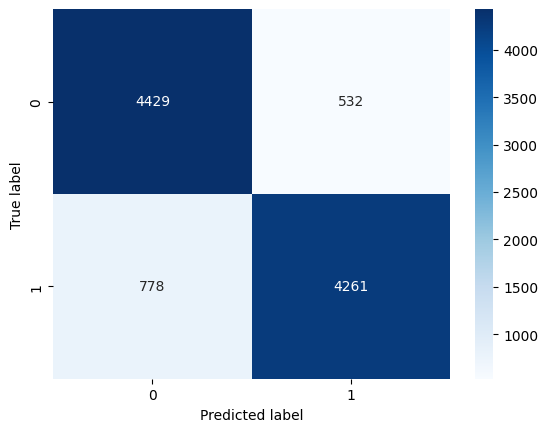

In [49]:
y_pred = model_lstm.predict(pad_test)
y_pred = (y_pred>0.5).astype(int)

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [55]:
wrong_prediction_indices = np.where(y_pred.reshape(-1) !=y_test)[0]

In [57]:
len(wrong_prediction_indices)

1310

In [74]:
wrong_predictions = data_copy.iloc[wrong_prediction_indices,:]
wrong_predictions


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
5,"Probably my all-time favorite movie, a story o...",positive
7,"This show was an amazing, fresh & innovative i...",negative
20,After the success of Die Hard and it's sequels...,positive
29,'War movie' is a Hollywood genre that has been...,positive
...,...,...
9956,"Camp Blood looked great when I was buying it, ...",negative
9960,"I just saw this movie, and I have to say that ...",negative
9989,I had high expectations for this indie having ...,negative
9990,I have watched this movie quite bemused. I am ...,negative


In [72]:
wrong_predictions = wrong_predictions.reset_index(drop=True)
wrong_predictions.iloc[2,0]

"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to the complete waste of time it is today.<br /><br />It's truly disgraceful how far this show has fallen. The writing is painfully bad, the performances are almost as bad - if not for the mildly entertaining respite of the guest-hosts, this show probably wouldn't still be on the air. I find it so hard to believe that the same creator that hand-selected the original cast also chose the band of hacks that followed. How can one recognize such brilliance and then see fit to replace it with such mediocrity? I felt I must give 2 stars out of respect for the original cast that made this show such a huge success. As it is now, the show is just awful. I can't believe it's still on the air."

In [73]:
wrong_predictions.iloc[0,0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [75]:
wrong_predictions.iloc[1,0]

'Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it\'s not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas\' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother\'s slow awakening to what\'s happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they\'d all be "up" for this movie.'